<h1 align="center"><b>Stock Market Technical Analysis</b></h1>
<h2 align="center"><b>Algorithmic Approach</b></h2>
<h2 align="center"><b>for</b></h2>
<h2 align="center"><b>Investing in the Stock Market</b></h2>
<h2 align="center"><b>using Python</b></h2>
<br>
<h1 align="center"><b>Miguel Secillano</b></h1>
<h3 align="center"><b>(2021/2022 Science Fair Project)</b></h3>

<hr>
<br>
<h1 align="center"><b>Notebook 1</b></h1>
<h2 align="center"><b>Single Stock</b></h2>
<h3 align="center"><b>(Initial Experimentation)</b></h3>
<br>
<hr>
<br>

In [66]:
# #%%
# %load_ext autoreload
# %autoreload 2

# Load necessary library modules
import yfinance as yf # Yahoo Finance, where the data comes from
import pandas as pd # Data Analysis
import matplotlib.pyplot as plt # Data Visualization
import matplotlib.ticker as mtick # Data Visualization Formatter

plt.style.use("seaborn")

In [67]:
def list_dictionary_pairs(dict):
    print_stock_symbol_name(dict)
    for key, value in dict.items():
        print(key, ":", value)


def print_stock_symbol_name(dict):
    print(dict["symbol"] + ":", dict["shortName"])
    print("=" * 40)


def get_historial_data(ticker):
    return ticker.history(period="max")


In [68]:
stock = "^GSPC" # stock symbol ^GSPC
stock_ticker = yf.Ticker(stock)

In [69]:
stock_info = stock_ticker.info

In [70]:
df_history = get_historial_data(stock_ticker) # gets historical data

In [71]:
print(df_history)

                   Open         High          Low        Close      Volume  \
Date                                                                         
1927-12-30    17.660000    17.660000    17.660000    17.660000           0   
1928-01-03    17.760000    17.760000    17.760000    17.760000           0   
1928-01-04    17.719999    17.719999    17.719999    17.719999           0   
1928-01-05    17.549999    17.549999    17.549999    17.549999           0   
1928-01-06    17.660000    17.660000    17.660000    17.660000           0   
...                 ...          ...          ...          ...         ...   
2021-09-13  4474.810059  4492.990234  4445.700195  4468.729980  3096390000   
2021-09-14  4479.330078  4485.680176  4435.459961  4443.049805  2568730000   
2021-09-15  4447.490234  4486.870117  4438.370117  4480.700195  3154760000   
2021-09-16  4477.089844  4485.870117  4443.799805  4473.750000  3321030000   
2021-09-17  4469.740234  4471.520020  4427.759766  4432.990234  

In [72]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23541 entries, 1927-12-30 to 2021-09-17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          23541 non-null  float64
 1   High          23541 non-null  float64
 2   Low           23541 non-null  float64
 3   Close         23541 non-null  float64
 4   Volume        23541 non-null  int64  
 5   Dividends     23541 non-null  int64  
 6   Stock Splits  23541 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.4 MB


In [73]:
df_history.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [74]:
# deletes the Dividends and Stock Splits columns from data; we don't need them
df_history.drop("Dividends", axis=1, inplace=True)
df_history.drop("Stock Splits", axis=1, inplace=True)
df_history.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [75]:
daily_return = df_history["Close"].pct_change(1)

In [76]:
daily_return[1:]

Date
1928-01-03    0.005663
1928-01-04   -0.002252
1928-01-05   -0.009594
1928-01-06    0.006268
1928-01-09   -0.009060
                ...   
2021-09-13    0.002276
2021-09-14   -0.005747
2021-09-15    0.008474
2021-09-16   -0.001551
2021-09-17   -0.009111
Name: Close, Length: 23540, dtype: float64

In [77]:
df_history["Daily Return"] = daily_return

In [78]:
df_history.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Daily Return'], dtype='object')

In [79]:
df_history

,Open,High,Low,Close,Volume,Daily Return
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,NaN
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0.005663
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,-0.002252
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,-0.009594
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0.006268
...,...,...,...,...,...,...
2021-09-13,4474.810059,4492.990234,4445.700195,4468.729980,3096390000,0.002276
2021-09-14,4479.330078,4485.680176,4435.459961,4443.049805,2568730000,-0.005747
2021-09-15,4447.490234,4486.870117,4438.370117,4480.700195,3154760000,0.008474


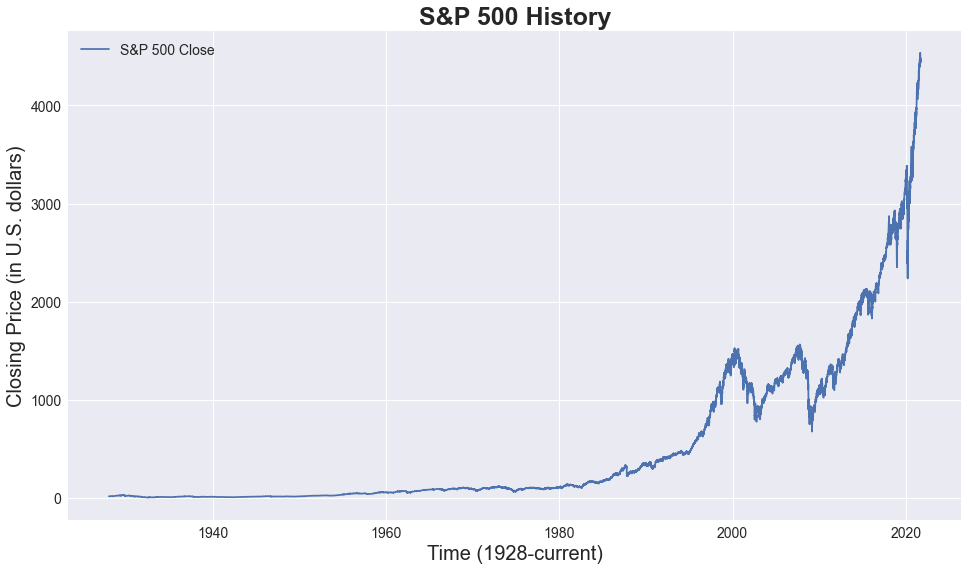

In [80]:
# makes plot for data
plt.figure(figsize=(16,9))
plt.plot(df_history["Close"], label="S&P 500 Close")
plt.title("S&P 500 History", fontsize=25, fontweight="bold")
plt.xlabel("Time (1928-current)", fontsize=20)
plt.ylabel("Closing Price (in U.S. dollars)", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [81]:
daily_return_rate = []
monthly_return_rate = {"01": 0, "02": 0, "03": 0, "04": 0, "05": 0, "06": 0,
                       "07": 0, "08": 0, "09": 0, "10": 0, "11": 0, "12": 0}
sum = 0
for i in range(1, len(df_history) - 1):
    month = str(df_history.index[i]).split("-")[1]
    drr = df_history["Daily Return"][i]
    daily_return_rate.append((month, drr))
    monthly_return_rate[month] += drr
monthly_return_rate

{'01': 1.1401213977701072,
 '02': -0.06886602780141293,
 '03': 0.45518719239995975,
 '04': 1.3217151761502346,
 '05': -0.07730973962063203,
 '06': 0.7349681106642892,
 '07': 1.4648312601589217,
 '08': 0.6533595640734299,
 '09': -0.9775309569779927,
 '10': 0.486550017398222,
 '11': 0.8192954241753544,
 '12': 1.2724005008379928}

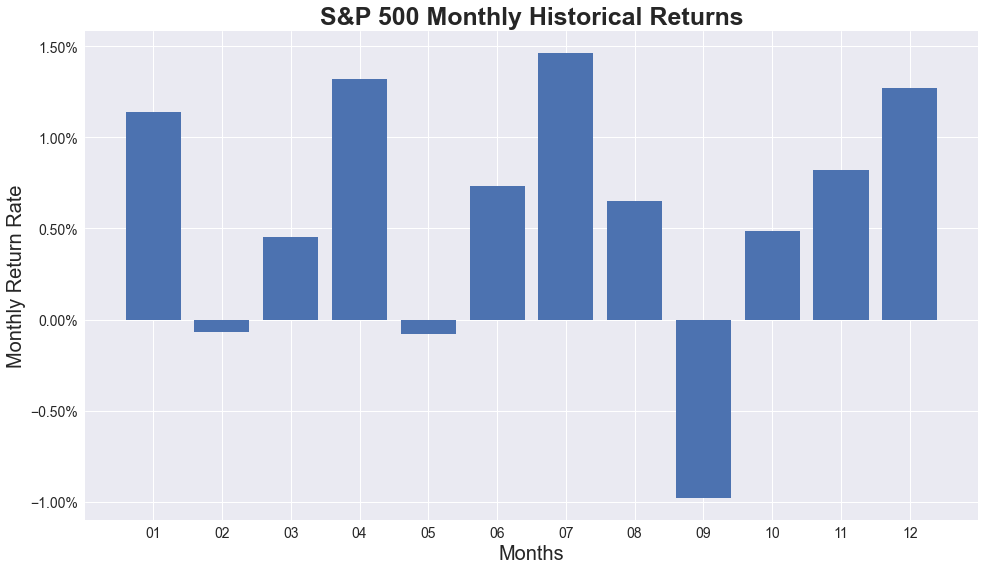

In [82]:
# makes plot for data
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 1, 1)
plt.bar(monthly_return_rate.keys(), height=monthly_return_rate.values())
plt.title("S&P 500 Monthly Historical Returns", fontsize=25, fontweight="bold")
plt.xlabel("Months", fontsize=20)
plt.ylabel("Monthly Return Rate", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()